In [1]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    return input2 + "and vikas from second function"

In [2]:
from langgraph.graph import Graph

In [3]:
workflow1 = Graph()

In [ ]:
workflow1.add_node("function1", function1)

In [5]:
workflow1.add_node("function2", function2)

In [6]:
workflow1.add_edge("function1", "function2")

In [7]:
workflow1.set_entry_point("function1")

In [8]:
workflow1.set_finish_point("function2")

In [9]:
app1 = workflow1.compile()

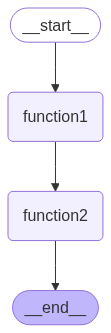

In [10]:
from IPython.display import Image, display

try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [11]:
app1.invoke("hi this is vikas ")

'hi this is vikas from first functionand vikas from second function'

In [12]:
input = "hi this is vikas "

for output in app1.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("________")
        print(value)
        print("\n")

here is output from function1
________
hi this is vikas from first function


here is output from function2
________
hi this is vikas from first functionand vikas from second function




In [13]:
def function3(input3):
    return input3

In [14]:
def function1(input1):
    return input1 + "from first function"

def function2(input2):
    output = function3("this is function 3 in between")
    return input2 + " " + output + " and vikas from second function"

In [15]:
workflow1 = Graph()

In [16]:
workflow1.add_node("function1", function1)
workflow1.add_node("function2", function2)
workflow1.add_edge("function1", "function2")
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")

In [17]:
app1 = workflow1.compile()

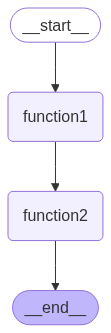

In [18]:
try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [19]:
app1.invoke("hi this is vikas ")

'hi this is vikas from first function this is function 3 in between and vikas from second function'

In [20]:
input = "hi this is vikas "

for output in app1.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("________")
        print(value)
        print("\n")

here is output from function1
________
hi this is vikas from first function


here is output from function2
________
hi this is vikas from first function this is function 3 in between and vikas from second function




#### Now creating worflow with llm

In [21]:
import os
from dotenv import load_dotenv
load_dotenv()

True

In [22]:
GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")
GROQ_API_KEY = os.getenv("GROQ_API_KEY")
LANGCHAIN_API_KEY = os.getenv("LANGCHAIN_API_KEY")
LANGCHAIN_PROJECT = os.getenv("LANGCHAIN_PROJECT")
LANGSMITH_TRACING="true"
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY= os.getenv("LANGSMITH_API_KEY")

In [23]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

d:\learning\learn_langgraph_ss\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [24]:
from langchain_groq import ChatGroq
llm = ChatGroq(model_name="Llama3-8b-8192")

In [ ]:
# Free embedding
# from langchain_google_genai import GoogleGenerativeAIEmbeddings
# ee = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [29]:
def function1(input):
    llm = ChatGroq(model_name="Llama3-8b-8192")
    response = llm.invoke(input)
    return response.content

In [30]:
def function2(input):
    upper_case = input.upper()
    return upper_case

In [31]:
workflow2 = Graph()

In [33]:
workflow2.add_node("llm", function1)
workflow2.add_node("upper_string", function2)
workflow2.add_edge("llm", "upper_string")
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

In [34]:
app2 = workflow2.compile()

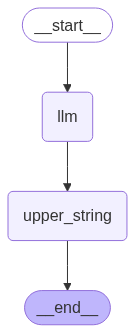

In [36]:
try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [37]:
app2.invoke("What is the name of Indian Prime Minister?")

'AS OF MY KNOWLEDGE CUTOFF, THE CURRENT PRIME MINISTER OF INDIA IS NARENDRA DAMODARDAS MODI.'

In [38]:
input = "What is the name of Indian Prime Minister?"

for output in app2.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("________")
        print(value)
        print("\n")

here is output from llm
________
As of my knowledge cutoff, the current Prime Minister of India is Narendra Damodardas Modi. He has been serving as the Prime Minister of India since May 26, 2014.


here is output from upper_string
________
AS OF MY KNOWLEDGE CUTOFF, THE CURRENT PRIME MINISTER OF INDIA IS NARENDRA DAMODARDAS MODI. HE HAS BEEN SERVING AS THE PRIME MINISTER OF INDIA SINCE MAY 26, 2014.




#### Now creating our own output token counter

In [39]:
def function3(input):
    token = input.split()
    token_number = len(token)
    token_number = f"total token number is {token_number}"
    return token_number

In [40]:
workflow3 = Graph()
workflow3.add_node("llm", function1)
workflow3.add_node("token_counter", function3)
workflow3.add_edge("llm", "token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3 = workflow3.compile()

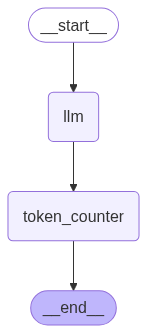

In [41]:
try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [42]:
app3.invoke("What is the name of Indian Prime Minister?")

'total token number is 31'

In [43]:
input = "What is the name of Indian Prime Minister?"

for output in app3.stream(input):
    for key, value in output.items():
        print(f"here is output from {key}")
        print("________")
        print(value)
        print("\n")

here is output from llm
________
As of my knowledge cutoff, the current Prime Minister of India is Narendra Damodardas Modi. He has been serving as the Prime Minister of India since May 26, 2014.


here is output from token_counter
________
total token number is 29


